In [1]:
import pandas as pd
import numpy as np
# from datetime import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\Coursera

03/11/2021  07:43 AM    <DIR>          .
03/11/2021  07:43 AM    <DIR>          ..
01/11/2021  01:38 PM    <DIR>          .ipynb_checkpoints
05/11/2020  12:04 AM        69,333,608 202010-divvy-tripdata.csv
05/12/2020  09:08 AM        46,203,255 202011-divvy-tripdata.csv
06/01/2021  12:43 AM        25,031,027 202012-divvy-tripdata.csv
05/02/2021  08:42 AM        18,391,685 202101-divvy-tripdata.csv
10/03/2021  10:41 AM         9,365,975 202102-divvy-tripdata.csv
09/04/2021  01:17 AM        43,555,310 202103-divvy-tripdata.csv
08/05/2021  01:03 AM        64,035,536 202104-divvy-tripdata.csv
12/06/2021  01:34 AM        99,896,575 202105-divvy-tripdata.csv
16/07/2021  09:45 AM       136,439,093 202106-divvy-tripdata.csv
14/08/2021  04:42 PM       154,040,041 202107-divvy-tripdata.csv
03/09/2021  08:09 AM       150,970,305 202108-divvy-tripdata.csv
05/10/2021  0

In [3]:
df = pd.read_csv("Cyclistic_202010_202109.csv")
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
0,0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29
1,1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08
2,2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21
3,3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52
4,4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  riding_days         int64  
 15  riding_time         object 
dtypes: float64(4), int64(2), object(10)
memory usage: 627.0+ MB


In [8]:
# Check any duplicates
df.duplicated().sum()

0

# 3. Process
1. Create a column called ride_length
2. Create a column called day_of_week

### 3-1. Add ride_length
* ride_length = ended_at - started_at
* Format as HH:MM:SS

In [12]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [6]:
# https://stackoverflow.com/questions/31929538/how-to-subtract-datetimes-timestamps-in-python/31929686
# https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes
# https://stackoverflow.com/questions/63371428/how-to-convert-a-string-to-timestamp-in-pandas

# Change type of data from object to datetime to compute ride_length
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y/%m/%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y/%m/%d %H:%M:%S')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 509.4+ MB


There are - sign in days (-21 days) with + sign in time (+19:50:02)

As ride_length contains days and time, I'm going to make to columns **riding_days** and **riding_time**
, and store days and time separately. 

In [37]:
# Calculate riding time 
(df.ended_at - df.started_at).sort_values(ascending = False)

2616215   38 days 20:24:09
2566009   38 days 16:11:41
1535226   37 days 10:41:36
2102247   36 days 14:21:23
3390459   34 days 02:27:09
                ...       
1949994    0 days 00:00:00
1564331    0 days 00:00:00
1707147    0 days 00:00:00
2904893    0 days 00:00:00
1222860    0 days 00:00:00
Length: 5136261, dtype: timedelta64[ns]

Add the **riding_days** and **riding_time** columns, and then take out the data contaning - and + signs in the two columns.

In [193]:
(df['ended_at'] - df['started_at'])

0         0 days 00:17:29
1         0 days 00:14:08
2         0 days 00:08:21
3         0 days 00:02:52
4         0 days 00:16:13
                ...      
4964004   0 days 00:00:10
5000204   0 days 00:01:11
5006200   0 days 00:03:41
5012090   0 days 00:03:18
5089749   0 days 00:04:29
Length: 5136261, dtype: timedelta64[ns]

In [14]:
df['riding_days'] = (df['ended_at'] - df['started_at']).astype(str).str.split(expand = True)[0]
df['riding_time'] = (df['ended_at'] - df['started_at']).astype(str).str.split(expand = True)[2]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  riding_days         object        
 14  riding_time         object        
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 587.8+ MB
None


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13


Both rd and rt have the same number of rows, but I want to make sure if they have the same data by checking if they have the same ride_id. 

In [77]:
# df[df.riding_days.str[0] == '-' & df.riding_time.str[0] == '+']  # Boolean only?
# Find the day with -
rd = df[df.riding_days.str[0] == '-'] # 3304 rows
# Find the time with + 
rt = df[df.riding_time.str[0] == '+'] # 3304 rows

In [63]:
# Check both columns have the same ride_id
for i in range(len(rd.ride_id.values)):
    if rd.ride_id.values[i] not in rt.ride_id.values:
        print(rd.ride_id.values[i])
    
    if rt.ride_id.values[i] not in rd.ride_id.values:
        print(rt.ride_id.values[i])

Let's see why they contain - and +

It seems like some customers were confused their start time (started_at) and end time (ended_at). They put start time in ended_at and end time in started_at.  

Swap started_at to ended_ate and ended_at to started_at, then caculate riding_days and riding_time again. 

In [75]:
rt.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
32780,FFF850D8D4C3EFC9,electric_bike,2020-10-16 16:45:00,2020-10-16 15:58:41,Clifton Ave & Armitage Ave,223.0,Larrabee St & Webster Ave,144.0,41.918163,-87.657064,41.921848,-87.644057,casual,-1,+23:13:41
46480,75874A668F5D45FC,electric_bike,2020-10-16 16:44:52,2020-10-16 15:09:51,Western Ave & Lunt Ave,467.0,Washtenaw Ave & Lawrence Ave,475.0,42.008629,-87.690423,41.968806,-87.696170,casual,-1,+22:24:59
57014,ADA7858EFEF88FE5,docked_bike,2020-10-24 13:10:09,2020-10-24 13:09:40,St. Clair St & Erie St,211.0,Clark St & Lincoln Ave,141.0,41.894448,-87.622663,41.915689,-87.634600,member,-1,+23:59:31
58361,283B66C6E06858FE,docked_bike,2020-10-09 17:50:12,2020-10-09 17:47:03,Clark St & Wellington Ave,156.0,NaN,NaN,41.936496,-87.647538,NaN,NaN,member,-1,+23:56:51
58369,A435A15ADC61422C,docked_bike,2020-10-07 17:53:38,2020-10-07 17:53:24,Theater on the Lake,177.0,Michigan Ave & Oak St,85.0,41.926277,-87.630834,41.900960,-87.623777,member,-1,+23:59:46


In [104]:
# rt.loc[:, ['started_at','ended_at']] same as rt.loc[:, ('started_at','ended_at')]
# rt.loc[:, ('started_at','ended_at')] = rt.loc[:, ('ended_at', 'started_at')]

# As rt and rd have the same data, I think I can do it in this way too
# rt[['started_at', 'ended_at']] = rd[['ended_at', 'started_at']]

rt[['started_at', 'ended_at']] = rt[['ended_at', 'started_at']]
rt.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
32780,FFF850D8D4C3EFC9,electric_bike,2020-10-16 15:58:41,2020-10-16 16:45:00,Clifton Ave & Armitage Ave,223.0,Larrabee St & Webster Ave,144.0,41.918163,-87.657064,41.921848,-87.644057,casual,0,00:46:19
46480,75874A668F5D45FC,electric_bike,2020-10-16 15:09:51,2020-10-16 16:44:52,Western Ave & Lunt Ave,467.0,Washtenaw Ave & Lawrence Ave,475.0,42.008629,-87.690423,41.968806,-87.696170,casual,0,01:35:01
57014,ADA7858EFEF88FE5,docked_bike,2020-10-24 13:09:40,2020-10-24 13:10:09,St. Clair St & Erie St,211.0,Clark St & Lincoln Ave,141.0,41.894448,-87.622663,41.915689,-87.634600,member,0,00:00:29
58361,283B66C6E06858FE,docked_bike,2020-10-09 17:47:03,2020-10-09 17:50:12,Clark St & Wellington Ave,156.0,NaN,NaN,41.936496,-87.647538,NaN,NaN,member,0,00:03:09
58369,A435A15ADC61422C,docked_bike,2020-10-07 17:53:24,2020-10-07 17:53:38,Theater on the Lake,177.0,Michigan Ave & Oak St,85.0,41.926277,-87.630834,41.900960,-87.623777,member,0,00:00:14


In [102]:
# Calcuate riding_days and riding_time again
rt.riding_days = (rt.ended_at - rt.started_at).astype(str).str.split(expand = True)[0]
rt.riding_time = (rt.ended_at - rt.started_at).astype(str).str.split(expand = True)[2]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
32780,FFF850D8D4C3EFC9,electric_bike,2020-10-16 16:45:00,2020-10-16 15:58:41,Clifton Ave & Armitage Ave,223.0,Larrabee St & Webster Ave,144.0,41.918163,-87.657064,41.921848,-87.644057,casual,0,00:46:19
46480,75874A668F5D45FC,electric_bike,2020-10-16 16:44:52,2020-10-16 15:09:51,Western Ave & Lunt Ave,467.0,Washtenaw Ave & Lawrence Ave,475.0,42.008629,-87.690423,41.968806,-87.696170,casual,0,01:35:01
57014,ADA7858EFEF88FE5,docked_bike,2020-10-24 13:10:09,2020-10-24 13:09:40,St. Clair St & Erie St,211.0,Clark St & Lincoln Ave,141.0,41.894448,-87.622663,41.915689,-87.634600,member,0,00:00:29
58361,283B66C6E06858FE,docked_bike,2020-10-09 17:50:12,2020-10-09 17:47:03,Clark St & Wellington Ave,156.0,NaN,NaN,41.936496,-87.647538,NaN,NaN,member,0,00:03:09
58369,A435A15ADC61422C,docked_bike,2020-10-07 17:53:38,2020-10-07 17:53:24,Theater on the Lake,177.0,Michigan Ave & Oak St,85.0,41.926277,-87.630834,41.900960,-87.623777,member,0,00:00:14


In [111]:
len(df) # 5136261
# len(df[df.riding_time.str[0] == '+']) # 3304
5136261 - 3304 # 5132957

5132957

In [159]:
df1 = df.copy()

In [157]:
# Wrong data inputs sorted by year and month 
rt.started_at.astype(str).str[:7].value_counts()

2020-10    1911
2020-11    1243
2020-12      56
2021-09      36
2021-08      29
2021-07      13
2021-04       5
2021-06       5
2021-01       2
2021-03       2
2021-05       2
Name: started_at, dtype: int64

In [172]:
# *
# * This code takes more than an hour * #
# *

# for i in range(len(rt.index)):
#     df.drop(index = rt.index[i], inplace = True)
# len(df)

5132957

In [179]:
# Combine two dataframes 
df = pd.concat([df, rt])
# Check if the data is cleaned properly
len(df[df['riding_time'].str[0] == '+'])

0

In [186]:
df.loc[:,['riding_days']] = df.loc[:,['riding_days']].astype('int64')
df.sort_values(by = 'riding_days', ascending = False)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
2569233,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,38,16:11:41
2619440,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,-87.624117,41.877618,-87.673895,casual,38,20:24:09
1538445,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,37,10:41:36
2105470,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,36,14:21:23
3393698,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,34,02:27:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715750,74B7BE01BB3A595C,docked_bike,2021-05-24 19:14:54,2021-05-24 19:45:25,Adler Planetarium,13431,Buckingham Fountain,15541,41.866095,-87.607267,41.876511,-87.620548,casual,0,00:30:31
1715749,FFA258E6522F9FEF,docked_bike,2021-05-30 17:14:05,2021-05-30 17:45:20,Adler Planetarium,13431,Wabash Ave & Grand Ave,TA1307000117,41.866095,-87.607267,41.891466,-87.626761,casual,0,00:31:15
1715748,A92DBED8CFDBB195,electric_bike,2021-05-08 20:05:42,2021-05-08 21:08:41,Wells St & Hubbard St,TA1307000151,Wabash Ave & Grand Ave,TA1307000117,41.889986,-87.634400,41.891755,-87.625383,member,0,01:02:59
1715747,40CB16BBC11686A5,classic_bike,2021-05-01 22:55:23,2021-05-01 23:09:07,Clark St & Schiller St,TA1309000024,Wabash Ave & Grand Ave,TA1307000117,41.907993,-87.631501,41.891466,-87.626761,member,0,00:13:44


### 3-2. Add day_of_week
* day_of_week - e.g.1 = Sunday and 7 = Saturday.

In [14]:
# dayofweek and day_of_week - 0 = Mon, ..., 6 = Sun
# The requirement is that day_of_week needs to start from Sunday, but I still haven't found the code for it
# I will replace the code when I find  it 
df['day_of_week'] = df['started_at'].dt.dayofweek
df['day_name'] = df['started_at'].dt.day_name()
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time,day_of_week,day_name
0,0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29,5,Saturday
1,1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08,5,Saturday
2,2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21,5,Saturday
3,3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52,5,Saturday
4,4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13,5,Saturday


In [16]:
df.drop(columns = 'Unnamed: 0', inplace = True)

# 4. Analyse

1. Find mean, max, and mode of ride length 
2. Calculate the average ride length for members and casual riders
3. Calculate the average ride length for users by day of week
4. Calculate the number of rides for users by day of week 


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  riding_days         int64         
 14  riding_time         object        
 15  day_of_week         int64         
 16  day_name            object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(9)
memory usage: 666.2+ MB


### 4-1. Find mean, max, and mode of ride length
datetime -> astype(np.int64) -> mean() -> datetime

In [58]:
df['riding_time_hm_int'] = pd.to_datetime(df.riding_time.astype(str).str[:5]).values.astype(np.int64)

In [19]:
# make a column called riding_time_int to save time and to calculate average time easily 
df['riding_time_int'] = pd.to_datetime(df['riding_time']).values.astype(np.int64)

In [ ]:
# only hours and minuts contain - 00:34, 12:33 ...
df['riding_time_hm_int'] = pd.to_datetime(df.riding_time.astype(str).str[:5]).values.astype(np.int64)

In [21]:
df.member_casual.value_counts()

member    2777974
casual    2358287
Name: member_casual, dtype: int64

In [150]:
# https://stackoverflow.com/questions/52007139/get-the-average-date-from-multiple-dates-pandas
# https://stackoverflow.com/questions/54813811/how-to-compute-the-average-time-in-python-pandas
casual = df[df.member_casual == 'casual']
member = df[df.member_casual == 'member']

In [61]:
print("Mode riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_hm_int.max())).dt.time.astype(str).str[:5][0]))

Mode riding time: 23:59


In [68]:
print(pd.to_datetime(df.riding_time_int).value_counts().head())
print('')
print(pd.to_datetime(df.riding_time_hm_int).value_counts().head())


2021-11-03 00:06:25    4703
2021-11-03 00:06:04    4687
2021-11-03 00:06:17    4681
2021-11-03 00:05:58    4667
2021-11-03 00:05:52    4667
Name: riding_time_int, dtype: int64

2021-11-03 00:06:00    273300
2021-11-03 00:05:00    267862
2021-11-03 00:07:00    266523
2021-11-03 00:08:00    253850
2021-11-03 00:04:00    245759
Name: riding_time_hm_int, dtype: int64


In [77]:
len(df[pd.to_datetime(df.riding_time_hm_int) == '00:06:00'])

273300

In [47]:
print('Mean, Max, and Mode of ride length:')

print("\nMean riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("Max riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.max())).dt.time.astype(str).str[:8][0]))
print("Mode riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mode())).dt.time.astype(str).str[:8][0]))

print('\n-------------------------------------')
print('\nMean, Max, and Mode of ride days:')

print("\nMean riding days: {} days" .format(round(df.riding_days.mean()),2))
print("Max riding days: {} days" .format(df.riding_days.max()))
print("Mode riding days: {} days" .format(df.riding_days.mode()[0]))

Mean, Max, and Mode of ride length:

Mean riding time: 00:20:34
Max riding time: 23:59:57
Mode riding time: 00:06:25

-------------------------------------

Mean, Max, and Mode of ride days:

Mean riding days: 0 days
Max riding days: 38 days
Mode riding days: 0 days


As most of the riding_days are 0, the mean and mode of riding_days is 0.

But it is intersting that 19 days is higher than 2, 3, and 4 days, and 20 days is higher than 5, 6 and 8.

Were there any promotions? 

In [52]:
df.riding_days.value_counts().head(10)

0     5132294
1        2884
19        316
2         177
3         105
4          77
20         75
5          54
6          37
8          36
Name: riding_days, dtype: int64

### 4-2. Calculate the average ride length for members and casual riders

In [35]:
print('Average riding tiem for:')
print("\ncasual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

Average riding tiem for:

casual riders: 00:28:18
members: 00:14:01


### 4-3. Calculate the average ride length for users by day of week

In [406]:
print("Average riding_time for users by day of week: ")
avg_rt = pd.to_datetime(df.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean()).dt.time.astype(str).str[:8].reset_index()
avg_rt

Average riding_time for users by day of week: 


,day_of_week,day_name,riding_time_int
0,0,Monday,00:19:40
1,1,Tuesday,00:17:59
2,2,Wednesday,00:18:05
3,3,Thursday,00:17:33
4,4,Friday,00:19:29
5,5,Saturday,00:24:08
6,6,Sunday,00:25:08


### 4-4. Calculate the number of rides for users by day of week

In [407]:
print("Number of rides for users by day_of_week: ")
no_dow = df.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index()
no_dow

Number of rides for users by day_of_week: 


,day_of_week,day_name,ride_id
0,0,Monday,642309
1,1,Tuesday,658378
2,2,Wednesday,680454
3,3,Thursday,695262
4,4,Friday,745342
5,5,Saturday,924170
6,6,Sunday,790346


In [408]:
users_dow = avg_rt.head(7)
users_dow['all_user_count'] = no_dow['ride_id']

# Change the format 00:28:28 to 28.28, so I can draw plots 
users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
users_dow.rename(columns = {'riding_time_int' : 'all_user_rt_mean'}, inplace=True)
users_dow

C:\Users\GIS\AppData\Local\Temp/ipykernel_25104/2856351782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['all_user_count'] = no_dow['ride_id']
C:\Users\GIS\AppData\Local\Temp/ipykernel_25104/2856351782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,day_of_week,day_name,all_user_rt_mean,all_user_count
0,0,Monday,19.40,642309
1,1,Tuesday,17.59,658378
2,2,Wednesday,18.05,680454
3,3,Thursday,17.33,695262
4,4,Friday,19.29,745342
5,5,Saturday,24.08,924170
6,6,Sunday,25.08,790346


In [423]:
# casual riding time
c_rt = casual.groupby(['day_name', 'day_of_week'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# casual ride count
c_rc = casual.groupby(['day_name', 'day_of_week'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

# member rideing time
m_rt = member.groupby(['day_name', 'day_of_week'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# member ride count
m_rc = member.groupby(['day_name', 'day_of_week'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

In [424]:
print(c_rc.ride_id)
print(m_rc.ride_id)

1    266450
5    251510
6    257308
4    274693
0    339405
2    523875
3    445046
Name: ride_id, dtype: int64
1    375859
5    406868
6    423146
4    420569
0    405937
2    400295
3    345300
Name: ride_id, dtype: int64


In [425]:
print(users_dow.all_user_count)
c_rc.ride_id + m_rc.ride_id

0    642309
1    658378
2    680454
3    695262
4    745342
5    924170
6    790346
Name: all_user_count, dtype: int64


1    642309
5    658378
6    680454
4    695262
0    745342
2    924170
3    790346
Name: ride_id, dtype: int64

In [ ]:
# casual riding time mean minutes
users_dow['casual_user_rt_mean'] = pd.to_datetime(c_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# casual ride count
users_dow['casual_user_count'] = c_rc.ride_id

# member riding time mean minutes
users_dow['member_user_rt_mean'] = pd.to_datetime(m_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# member ride count
users_dow['member_user_count'] = m_rc.ride_id

In [426]:
users_dow

,day_of_week,day_name,all_user_rt_mean,all_user_count,casual_user_rt_mean,casual_user_count,member_user_rt_mean,member_user_count
0,0,Monday,19.40,642309,26.23,339405,13.42,405937
1,1,Tuesday,17.59,658378,28.28,266450,13.26,375859
2,2,Wednesday,18.05,680454,30.46,523875,15.27,400295
3,3,Thursday,17.33,695262,32.26,445046,15.45,345300
4,4,Friday,19.29,745342,24.23,274693,13.05,420569
5,5,Saturday,24.08,924170,25.52,251510,13.07,406868
6,6,Sunday,25.08,790346,24.59,257308,13.53,423146


# 5. Share
List of things to visualise:

0. mean, max, and mode of ride time and days - table
1. Number of memebers and casual riders - pie chart
2. top 5 mode of ridie time and days - histogram
3. the average ride length for members and casual riders - bar chart
4. the average ride length for users by day of week - line or bar chart
5. the number of rides for users by day of week - line or bar chart               
---
6. the number of members and casuals - pie chart
7. rideable_tyle - pie or bar chart
8. in which month people ride a bike most - bar chart 
9. top 5 frequent start and end station - hist


## 5-1. Number of memebers and casual riders 

In [468]:
member_types = df.member_casual.value_counts().reset_index()
member_types.rename(columns = {'index': 'type', 'member_casual': 'count'}, inplace = True)
member_types

,type,count
0,member,2777974
1,casual,2358287


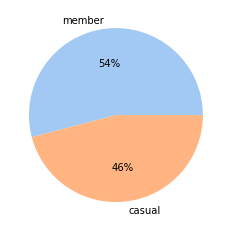

In [481]:
pie_data = member_types['count'].values
pie_labels = member_types['type'].values

colours = sns.color_palette('pastel')[0:5]

plt.pie(x = pie_data, labels = pie_labels, colors = colours, autopct='%.0f%%')
plt.show()

### 5-2. Top 5 frequent of ridie time and days

In [457]:
print(pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head())
print(pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head())

00:08    96832
00:09    96780
00:07    94687
00:10    93343
00:11    89681
Name: riding_time_hm_int, dtype: int64
00:05    188620
00:06    183974
00:04    182023
00:07    171836
00:08    157018
Name: riding_time_hm_int, dtype: int64


In [139]:
rt_top_5 = pd.to_datetime(df.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
rt_top_5 = pd.DataFrame(rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

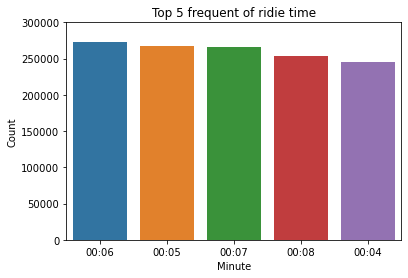

In [267]:
chart = sns.barplot(data= rt_top_5, x = 'time', y = 'count')
chart.set_title('Top 5 frequent of ride time')
chart.set(xlabel = 'Minute', ylabel = 'Count', ylim = (0, 300000))
plt.show()

In casual and members

In [485]:
casual_rt_top_5 = pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
casual_rt_top_5 = pd.DataFrame(casual_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

member_rt_top_5 = pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
member_rt_top_5 = pd.DataFrame(member_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

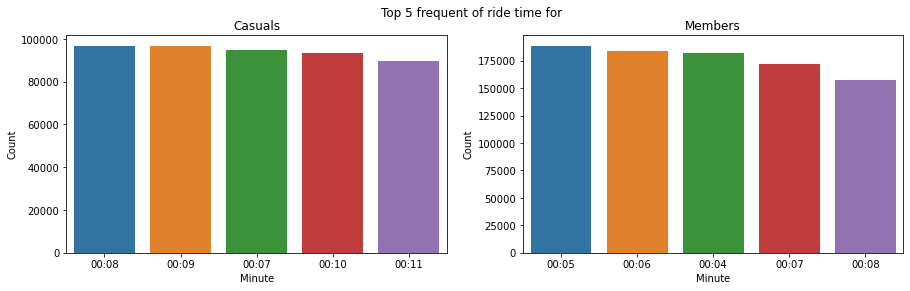

In [487]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))
fig.suptitle('Top 5 frequent of ride time for')

sns.barplot(ax = axes[0], data= casual_rt_top_5, x = 'time', y = 'count')
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Minute', ylabel = 'Count')

sns.barplot(ax = axes[1], data= member_rt_top_5, x = 'time', y = 'count')
axes[1].set_title('Members')
axes[1].set(xlabel = 'Minute', ylabel = 'Count')

plt.show()

### 5-3. Average ride length for members and casual riders

In [ ]:
print("\ncasual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

In [207]:
plt_df = pd.DataFrame(data = {'type' : ['casual', 'member'], 'time' : ['00:28:18', '00:14:01']})
plt_df['minutes'] = plt_df.time.str[3:5].astype('int64')
plt_df

,type,time,minutes
0,casual,00:28:18,28
1,member,00:14:01,14


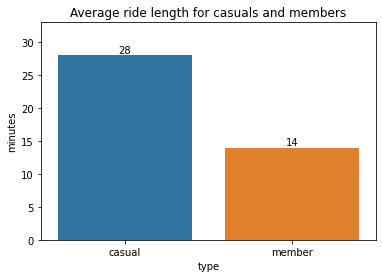

In [243]:
# casual_rt_mean = pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8]
# member_rt_mean = pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8]
chart = sns.barplot(x = plt_df['type'], y = plt_df['minutes'])
chart.set_title("Average ride length for casuals and members")
chart.set_ylim(0,33)
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')
plt.show()

### 5-4. Average ride length for users by day of week - line or bar chart

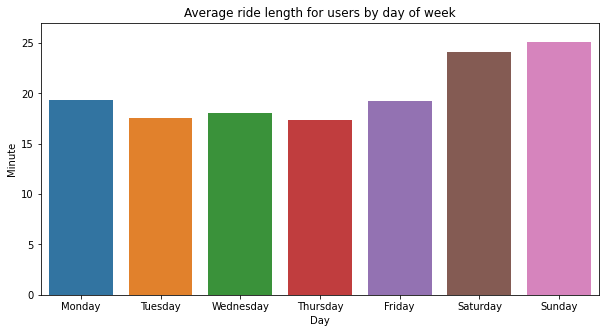

In [427]:
fig, axes = plt.subplots(1,1, figsize = (10, 5))
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_rt_mean)
chart.set_title("Average ride length for users by day of week")
chart.set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 27))
plt.show()

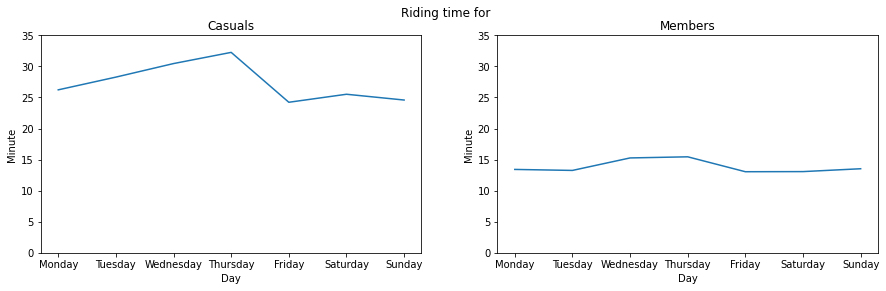

In [456]:
fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Riding time for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_rt_mean)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_rt_mean)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))
plt.show()

### 5-5. Number of rides for users by day of week - line or bar chart

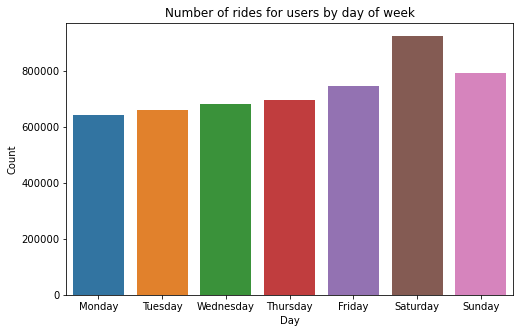

In [447]:
fig, axes = plt.subplots(1,1, figsize = (8, 5))

# chart = sns.lineplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart.set_title('Number of rides for users by day of week')
chart.set(xlabel = "Day", ylabel = "Count")

plt.show()

# Something wrong

In [493]:
print(users_dow[['day_name', 'casual_user_count']])
casual.groupby('day_name')['ride_id'].count()

    day_name  casual_user_count
0     Monday             339405
1    Tuesday             266450
2  Wednesday             523875
3   Thursday             445046
4     Friday             274693
5   Saturday             251510
6     Sunday             257308


day_name
Friday       339405
Monday       266450
Saturday     523875
Sunday       445046
Thursday     274693
Tuesday      251510
Wednesday    257308
Name: ride_id, dtype: int64

In [490]:
users_dow.all_user_count

0    642309
1    658378
2    680454
3    695262
4    745342
5    924170
6    790346
Name: all_user_count, dtype: int64

In [489]:
users_dow.casual_user_count + users_dow.member_user_count

0    745342
1    642309
2    924170
3    790346
4    695262
5    658378
6    680454
dtype: int64

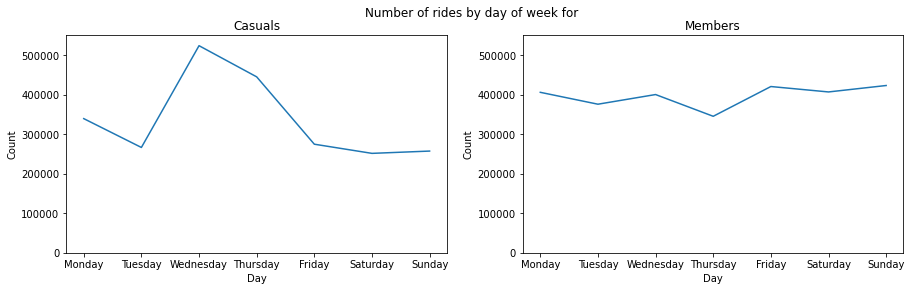

In [455]:
fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Number of rides by day of week for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_count)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_count)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))
plt.show()

# 6. Act 

In [ ]:
print('Mean, Max, and Mode of ride length:')

rt_mean = pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8]
rt_max = pd.Series(pd.to_datetime(df.riding_time_int.max())).dt.time.astype(str).str[:8]
rt_mode = pd.Series(pd.to_datetime(df.riding_time_int.mode())).dt.time.astype(str).str[:8]
pd.DataFrame(data = {'mean' : rt_mean, 'max' : rt_max, 'mode' : rt_mode})

# pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]
# pd.Series(pd.to_datetime(df.riding_time_int.max())).dt.time.astype(str).str[:8][0]
# pd.Series(pd.to_datetime(df.riding_time_int.mode())).dt.time.astype(str).str[:8][0]

# print('\n-------------------------------------')
print('\nMean, Max, and Mode of ride days:')

# print("\nMean riding days: {} days" .format(round(df.riding_days.mean())))
# print("Max riding days: {} days" .format(df.riding_days.max()))
# print("Mode riding days: {} days" .format(df.riding_days.mode()[0]))
rd_mean = pd.Series(round(df.riding_days.mean()))
rd_max = pd.Series(round(df.riding_days.max()))
rd_mode = pd.Series(round(df.riding_days.mode()))

pd.DataFrame(data = {'mean' : rd_mean, 'max' : rd_max, 'mode' : rd_mode})